## Laboratory 10

# Control design of a robot arm process

## 10.1 Independent Joint Control

Independent joint control is the classical control approach, where a controller is designed for each individual joint (fig 10.1}). The effect of other joints is considered as a disturbance that the controller has to reject.

<center>
    <figure class="image">
      <img src="artwork/control/Control_1.png" width=40% />
      <figcaption>Figure 10.1: Independent joint control - PD controllers</figcaption>
    </figure>
</center>


Let us first rewrite a 2DOF model in terms of each individual joint $i$ :

\begin{equation}\label{decoupledmodel}
d_{ii}\ddot{q}_i+c_{ii}\dot{q}_i=\tau_i-r^2_i w_i , \quad i=1,2,..,n \text{ (1)}
\end{equation}

where $d_{ii}$ includes only the constant diagonal terms of $D'(q)$, while the disturbance term $w_i$ includes all other $i^{th}$ terms of $D'(q)$, and $i^{th}$ components of $C(q,\dot{q})$ and $G(q)$. It is important to notice that if the the Coriolis and centripetal terms are not very large, then the process dynamics can be approximated well by _n decoupled linear second-order systems_.


### 10.1.1 Control problem

Design a linear controller for each joint that ensure tracking ($q$ tracks a reference signal $q_d$) and disturbance 
rejection ($w_{p}$).

Consider standard PD controllers
\begin{equation}\label{pd}
\tau_i=K(K_{di}\dot{e}_i+K_{pi}e_i) \text{ (2)}
\end{equation}
where $e_i$ represents the tracking error, defined as $e_i=q_{di}-q_{i}$, and
$\dot{e}_i=\dot{q}_{di}-\dot{q}_{i}$ is the error of the derivatives.

If we consider the case of set-point tracking, that is $\dot{q}_{di}=0$, and replace eq(2) in eq(1) we obtain:

\begin{equation}\label{simpleprocess}
d_{ii}\ddot{q}_i(t)+(c_{ii}+KK_{di})\dot{q}_i(t)+KK_{pi}q_i(t)=KK_{pi}q_{di}(t)-w_{pi}(t) , \quad i=1,2, \text{ (3)}
\end{equation}

By applying the Laplace transform we get the transfer function relating the outputs ($q_i$) to the reference and disturbance inputs ($q_{di}$ and $w_{pi}$):
\begin{equation}\label{tf}
q_i(s)=\frac{KK_{pi}}{d_{ii}s^2+(c_{ii}+KK_{di})s+KK_{pi}}q_{di}(s)-\frac{1}{d_{ii}s^2+(c_{ii}+KK_{di})s+KK_{pi}}w_{pi}(s), \quad i=1,2, \text{ (4)}
\end{equation}

The characteristic equations are 
\begin{equation}
{d_{ii}s^2+(c_{ii}+KK_{di})s+KK_{pi}}=0, \text{ (5)}
\end{equation}
which can also be written as
\begin{equation}
s^2+\frac{c_{ii}+KK_{di}}{d_{ii}}s+\frac{ KK_{pi}}{d_{ii}}=0.   \text{ (6)}
\end{equation}

Because the standard second order equation is given by
\begin{equation}
s^2+2 \zeta_i \omega_{ni}s+\omega^2_{ni}=0, \text{ (7)}
\end{equation}

the controller parameters can be expressed in terms of damping ratio $\zeta$ and natural frequency $\omega_n$:

\begin{equation}\label{pdgain}
K_{pi}=\frac{d_{ii}\omega^2_{ni}}{K} , \quad K_{di}=\frac{2\zeta_i \omega_{ni} d_{ii}-c_{ii}}{K}  \text{ (8)}
\end{equation}

Usually $\zeta$ is set to 1 (critical damping), and $\omega_n$ is chosen as high
as possible. One possible limitation in the value adopted for $\omega_n$ is the
input torque $\tau_i$ saturation.
The control strategy proves very efficient in practice. If we further want to force a very small or null steady state error $e_{ss}$, then we can either adopt PID type controllers

\begin{equation}\label{pid}
\tau_i=K_{di}\dot{e}_i+K_{pi}e_i+K_{ii}\int_{0}^{t} e\,dt, \text{ (9)}
\end{equation}

or PD controllers with an additional gravity term. Note that in this case the control signals are not decoupled anymore.

\begin{equation}\label{pdgrav}
\tau_i=K_{di}\dot{e}_i+K_{pi}e_i+G'_i(q) \text{ (10)}
\end{equation}

## 10.2 Computed Torque Control

Computed torque control (in some places called feedback linearization control) is a more sophisticated and modern control strategy that can be used to increase the control performances. The control consists out of an inner feedback loop and an outer feedback loop: fig.10.2. Although it is a nonlinear control approach, because the inner feedback loop achieves dynamic linearization, the outer feedback loop resume to a classical linear control design.  


<center>
    <figure class="image">
      <img src="artwork/control/Control_2.png" width=60% />
      <figcaption>Figure 10.2: Computed torque control - feedback linearization - principal control structure </figcaption>
    </figure>
</center>


Consider the robot arm process model from equation (1). By the change of notation $V(q,\dot{q})=C(q,\dot{q})\dot{q}+G(q)$ we can rewrite the model more compactly as

\begin{equation}\label{lastmodel}
D(q)\ddot{q}+V(q,\dot{q})=\tau \text{ (11)}
\end{equation}


Consider the following control law for the inner control loop:
\begin{equation}\label{controlaw}
\tau=D(q)(\ddot{q}_d-u)+V(q,\dot{q}) \text{ (12)}
\end{equation}

We define the tracking error as
\begin{equation}\label{error}
e=q_d-q. \text{ (13)}
\end{equation}
Then $\dot{e}=\dot{q}_d-\dot{q} \quad and \quad \ddot{e}=\ddot{q}_d-\ddot{q}$.

By replacing the torque from eq(9) in model eq(8), and using the definition eq(10), we obtain:

\begin{equation}\label{doubleintegrator}
\ddot{e}=u \text{ (14)}
\end{equation}


Thus the inner feedback loop achieves dynamic linearization, in other words the outer loop "sees" a double integrator process.
The double integrator model eq(11) can be written in state space form:

\begin{equation}
\dot{x}=Ax+Bu \text{ (15)}
\end{equation}

with 

\begin{equation}
x=\begin{bmatrix}
e\\
\dot{e}
\end{bmatrix},
A=\begin{bmatrix}
0_2 & I_2 \\
0_2 & 0_2 \\
\end{bmatrix},
B=\begin{bmatrix}
0_2 \\
I_2
\end{bmatrix} \text{ (16)}
\end{equation}

Now the outer loop can be designed by any classical linear control technique. We will consider here a state feedback control law with integrator component:

\begin{equation}\label{statefeedback}
u=-Kx+K_i\epsilon \text{ (17)}
\end{equation}

where $\epsilon$ is the output of the integrator ($\dot{\epsilon}=e$) - see Fig:10.3.
We will first design the state feedback gain K using Ackerman's formula for a $4^{th}$ order system:

\begin{equation}
K=[0 \, 0 \, 0 \, 1]M^{-1}_c \Delta(A) \text{ (18)}
\end{equation}

where $\Delta$ is the desired characteristic polynomial of the closed loop system

\begin{equation}
\Delta(s)=s^4+a_3s^3+a_2s^2+a_1s^1+a_0,  \text{ (19)}
\end{equation}

and $M_c$ is the controllability matrix:

\begin{equation}
M_c=[B|AB|A^2B|A^3B]. \text{ (20)}
\end{equation}

After the state feedback gain K is designed through pole placement, we will consider that the integrator gain can be designed through trial and error in simulations, in order the achieve the best tracking performances possible, while taking into account nonlinear effects like saturation, dead-zones or backlash.

Finally, the detailed control structure is shown in Figure 10.3.

<center>
    <figure class="image">
      <img src="artwork/control/Control_3.png" width=60% />
      <figcaption>Figure 10.3: Computed torque control - feedback linearization - detailed control structure </figcaption>
    </figure>
</center>

##  10.3 Numerical results

### 10.3.1 Robot arm example

As an example of a 2DOF robot with the structure as in Figure 7.1 (from Dynamic Model laboratory), consider the robot from Figure 8.4., that we model using eq(10.1).

The parameters are (The parameters were either measured or estimated) :$L_1=0.095 \ m$, $L_2=0.1 \ m$, $m_1=0.095 \ kg$, $m_2=0.37\ kg$, $g=9.81 \ m/s^2$, $I_{1x}=2.27 \ 10^{-2} \ kg \ m^2$, $I_{2y}=2.27 \ 10{-2} \ kg \ m^2$, $b_1=0.24$, $b_2=0.16$, $r=1$. The torque control signal is limited to the range $[-1.18,1.18] \, Nm$.

<center>
    <figure class="image">
      <img src="artwork/control/Control_4.png" width=40% />
      <figcaption>Figure 10.4: Real robot arm process  </figcaption>
    </figure>
</center>

### 10.3.2 Independent Joint Control

Here we will design PD controller for independent joint controller

\begin{equation}
\tau_1=K_{d1}\dot{e}_1+K_{p1}e_1,
\tau_2=K_{d2}\dot{e}_2+K_{p2}e_2, \text{ (21)}
\end{equation}

for the robot process eq(10.1), with the parameters given in previous section. We will use the formula eq(7.5), with $B=0, J_{p1}=0.0263$,$J_{p2}=0.0236$, $\zeta=1$, $K=1$. We started from a value for $\omega_n=\omega_{n1}=\omega_{n2}$ of 0.1, an increased it until the step response of the closed loop system is fast enough, and the control torques reach saturation for a small time interval. In the end, a value of $12$ provided good enough results.

The implementation of the controllers and process was done in Matlab/Simulink. Figure 10.5 shows simulations results of the closed loop system with step reference signals, while Figure 10.6 shows the control torques. The results show that a small steady state is present. This can be eliminated by adding a gravity term as in eq(10.7). The results with PD+gravity control are shown in Figure 10.7. It can be noticed that now the steady state error is zero. Note that in the case of PD+gravity controller, the controller is no longer joint independent, due to the gravity terms that contain expressions in both joint variables $q_1$ and $q_2$.

A more interesting and demanding tracking scenario is that when the reference signals are sinusoidal ($q_d(t)=sin(t)$), which is shown Figure 10.8 for the PD+gravity controllers. Although the steady state error is now exactly zero, because the reference continuously changes, the error is kept into very small limits.  

<center>
    <figure class="image">
      <img src="artwork/control/Control_5.png" width=70% />
      <figcaption>Figure 10.5: Simulations with PD independent joint control - step response </figcaption>
    </figure>
</center>

<center>
    <figure class="image">
      <img src="artwork/control/Control_6.png" width=70% />
      <figcaption>Figure 10.6: Control torques for PD independent joint control  </figcaption>
    </figure>
</center>

<center>
    <figure class="image">
      <img src="artwork/control/Control_7.png" width=70% />
      <figcaption>Figure 10.7:Simulations with PD+Gravity joint control - step response  </figcaption>
    </figure>
</center>

<center>
    <figure class="image">
      <img src="artwork/control/Control_8.png" width=70% />
      <figcaption>Figure 10.8: Simulations with PD+Gravity joint control - sinusoidal response </figcaption>
    </figure>
</center>





### 10.3.3. Computed Torque Control

Consider the inner feedback loop with control law eq(10.9), and the outer feedback loop with control law eq(10.14) (Figure 10.2)

We will design the state feedback gain K for the double integrator process eq(10.11), through pole placement. Consider the following closed loop pole configuration [-4 -4 -9 -9] (desired eigenvalues for $A-BK$). The poles where chosen such that we get an overdamped and fast enough response, while avoiding saturation as much as possible. As the poles are moved farther to the left in the complex plane, the response becomes faster, but the control effort increases. 

\begin{equation}
K=\begin{bmatrix}
36 & 0 & 13 & 0\\
0 & 36 & 0 & 13
\end{bmatrix} \text{ (22)}
\end{equation}



The integrator gain $K_i$ is found through trial and error in simulations:
we increase the gain starting from an initial value of 0.1 - until the maximum steady state error starts to increase. We keep the previous iterated value. Thus, we finally arrive at the value $0.6$ (that is $K_i=[0.6 \quad 0.6]$).   

For a better comparison between the performances of the PD+gravity control approach versus the computed torque control, we reconsider the sinusoidal reference input from the previous section, but now we will look directly at the tracking errors defined as $e_1=q_{d1}-q_1, \, e_2=q_{d2}-q_2$. Figure 10.9 shows the tracking errors for the two joint positions  in the case of PD+gravity control. The maximum error is about 0.05 rad (2.8 deg). For the Computed Torque control the results are shown in Figure 10.10. Notice that the maximum error is now much smaller 0.01 rad (0.5 deg). Of course that the cost is an increase complexity for the controller - the implementation requires a considerable increase in computational power.

<center>
    <figure class="image">
      <img src="artwork/control/Control_9.png" width=70% />
      <figcaption>Figure 10.9:Tracking error for PD$+$grav control  </figcaption>
    </figure>
</center>

<center>
    <figure class="image">
      <img src="artwork/control/Control_10.png" width=70% />
      <figcaption>Figure 10.10: Tracking error for Computer Torque Control </figcaption>
    </figure>
</center>

## 10.4 Proposed problems


  1. Consider the 2DOF robotic structure from laboratory 7, figure 10.11, with known matrices D,C,G given in the code. Implement an Independent Joint Control with PD controllers.
  
  
    a. Use step and then sinusoidals of different frequencies as input joint trajectories
    b. Add a saturation of -1.18, 1.18 for the input torque.
    c. Adapt the natural frequencies and observe their influence on the movement and position of the robot.
    d. Add an integrator and tune its gain manually, for a PID.
    
<center>
    <figure class="image">
      <img src="artwork/DynMod/fig7-1.png" width=30% />
      <figcaption>Figure 10.11: 2DOF robot </figcaption>
    </figure>
</center>
  



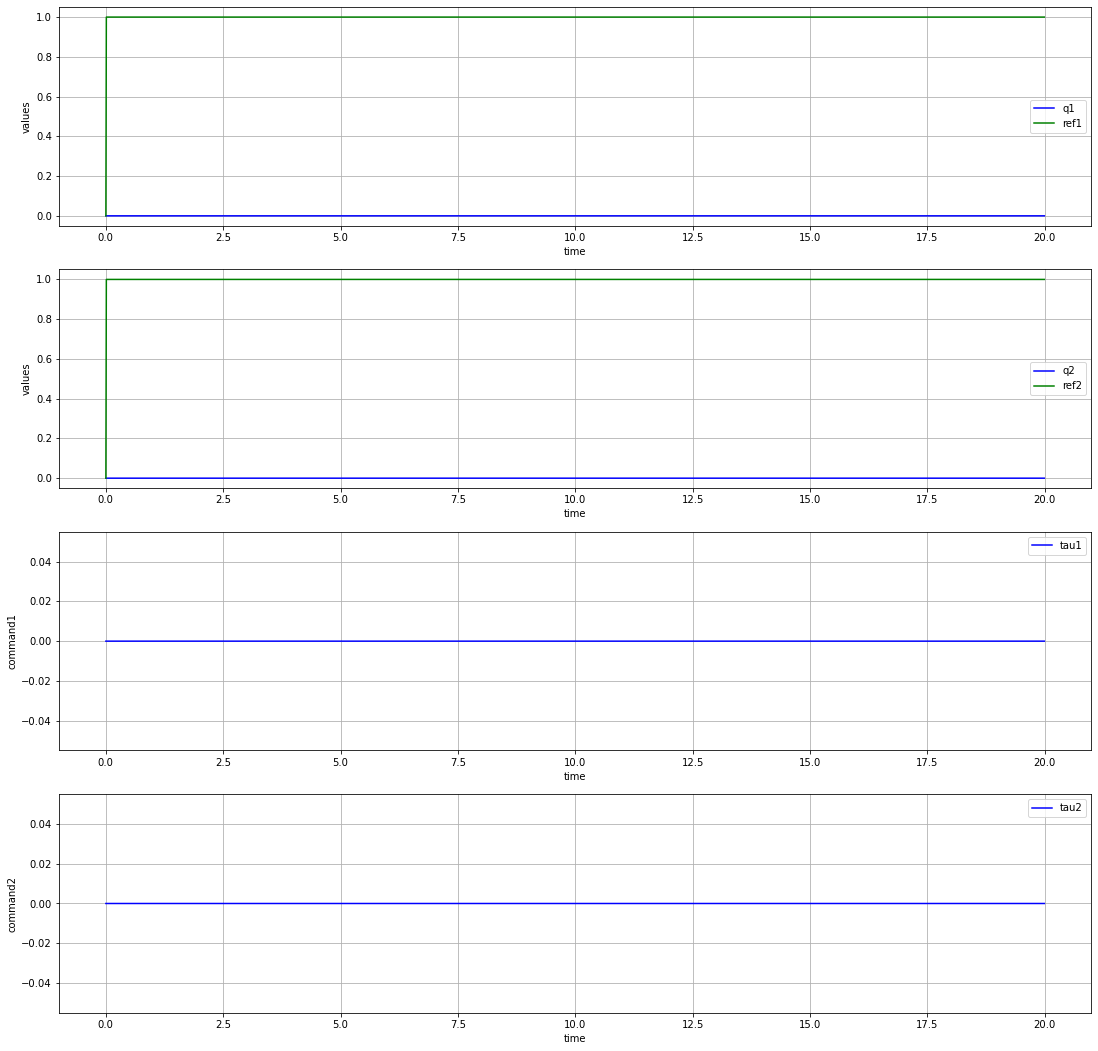

In [5]:
%reset -f
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math as m
from odeintw import *
from math import pi


def model(x,t,tau):
    g  = 9.8
  
    tau = tau.reshape(2,1) # reshaping for mathematical operations
    
    q  = x[:,0]  #first column of x, the states
    dq = x[:,1]  #second column of x, the states derivated

    D = np.array([ [0.003515*m.cos(q[1])+0.000925*m.cos(q[1])**2+0.026254,      0       ],
                 [0,                                                            0.023625] ])

    C = np.array([ [0.24-0.0017575*dq[1]*m.sin(q[1]) - 0.0004625*dq[1]*m.sin(2.0*q[1]), -0.0004625*dq[0]*m.sin(2.0*q[1]) - 0.0017575*dq[0]*m.sin(q[1])],
                   [0.0004625*dq[0]*m.sin(2.0*q[1]) + 0.0017575*dq[0]*m.sin(q[1]),      0.16                                                          ] ])

    G = np.array([ [(-0.1815*m.cos(q[1])-0.1376)*m.sin(q[0])],
                   [-0.18149*m.cos(q[0])*m.sin(q[1])      ] ])
    
    
    xdot1 = dq.reshape(2,1)
    xdot2 = np.matmul(np.linalg.inv(D), (tau - C.dot(dq).reshape(2,1) - G))
    
    xdot = np.concatenate((xdot1, xdot2), axis=1)

    return xdot




# time interval
dt = 0.01

# final time
tf = 20

# nr of samples
n = int(np.round(tf/dt))

# Desired time samples for the solution.
t = np.arange(0, tf, dt)

# step reference
sp = np.heaviside(t, 0)

q1  = np.zeros(n)
q2  = np.zeros(n)
dq1 = np.zeros(n)
dq2 = np.zeros(n)
tau1 = np.zeros(n)
tau2 = np.zeros(n)

# x0 is the initial condition.
x0 = np.array([[0.0, 0.0],
               [0.0, 0.0]])


# natural frequencies and damping coeff
xi  = 1
wn1 = 30
wn2 = 15

# solve ODE for each step
for i in range(2,n):

    # span for next time step
    tspan = [t[i-1],t[i]]  

    tau = np.array([[tau1[i]],[tau2[i]]])

    # solve for next step
    x = odeintw(model,x0,tspan,args=(tau,))

    # store solution for plotting
    q1[i]  = x[1][0,0]
    q2[i]  = x[1][1,0]
    dq1[i] = x[1][0,1]
    dq2[i] = x[1][1,1]

    # next initial condition 
    x0 = x[1]
    
    


fig = plt.figure()
fig.set_size_inches(18.5, 18.5)


plt.subplot(4, 1, 1)
plt.plot(t, q1, 'b', label='q1')
plt.plot(t, sp, 'g', label='ref1')
plt.legend(loc='best')
plt.ylabel('values')
plt.xlabel('time')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(t, q2, 'b', label='q2')
plt.plot(t, sp, 'g', label='ref2')
plt.legend(loc='best')
plt.ylabel('values')
plt.xlabel('time')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(t, tau1, 'b', label='tau1')
plt.legend(loc='best')
plt.ylabel('command1')
plt.xlabel('time')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(t, tau2, 'b', label='tau2')
plt.legend(loc='best')
plt.ylabel('command2')
plt.xlabel('time')
plt.grid(True)


plt.show()
    

